In [27]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
from config import weather_api_key
import requests

In [28]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [29]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [30]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [31]:
# Create an empty list to hold the weather data.
city_data = []
url = "Http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+weather_api_key
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | miragoane
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | necochea
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | joensuu
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | westport
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | itarema
Processing Record 13 of Set 1 | karaul
City not found. Skipping...
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | portland
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | bocas del toro
Processing Record 21 of Se

In [32]:
len(city_data)

588

In [33]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Miragoane,18.4423,-73.0876,79.97,78,94,6.82,HT,2021-10-28 02:00:27
1,Mar Del Plata,-38.0023,-57.5575,65.88,85,0,15.01,AR,2021-10-28 01:59:11
2,Necochea,-38.5473,-58.7368,65.03,74,0,10.74,AR,2021-10-28 02:00:28
3,Ushuaia,-54.8000,-68.3000,47.86,49,0,3.44,AR,2021-10-28 01:56:45
4,Torbay,47.6666,-52.7314,39.58,84,75,17.27,CA,2021-10-28 02:00:28
5,Joensuu,62.6012,29.7632,41.27,96,90,3.00,FI,2021-10-28 02:00:29
6,Bluff,-46.6000,168.3333,57.36,76,3,13.49,NZ,2021-10-28 02:00:29
7,Westport,41.1415,-73.3579,56.25,90,98,3.00,US,2021-10-28 02:00:21
8,Whitehorse,60.7161,-135.0538,35.31,92,99,11.01,CA,2021-10-28 02:00:30
9,Itarema,-2.9248,-39.9167,79.81,81,62,15.14,BR,2021-10-28 02:00:30


In [37]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp', 'Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Miragoane,HT,2021-10-28 02:00:27,18.4423,-73.0876,79.97,78,94,6.82
1,Mar Del Plata,AR,2021-10-28 01:59:11,-38.0023,-57.5575,65.88,85,0,15.01
2,Necochea,AR,2021-10-28 02:00:28,-38.5473,-58.7368,65.03,74,0,10.74
3,Ushuaia,AR,2021-10-28 01:56:45,-54.8000,-68.3000,47.86,49,0,3.44
4,Torbay,CA,2021-10-28 02:00:28,47.6666,-52.7314,39.58,84,75,17.27
5,Joensuu,FI,2021-10-28 02:00:29,62.6012,29.7632,41.27,96,90,3.00
6,Bluff,NZ,2021-10-28 02:00:29,-46.6000,168.3333,57.36,76,3,13.49
7,Westport,US,2021-10-28 02:00:21,41.1415,-73.3579,56.25,90,98,3.00
8,Whitehorse,CA,2021-10-28 02:00:30,60.7161,-135.0538,35.31,92,99,11.01
9,Itarema,BR,2021-10-28 02:00:30,-2.9248,-39.9167,79.81,81,62,15.14


In [41]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.sdfsdf
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [42]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

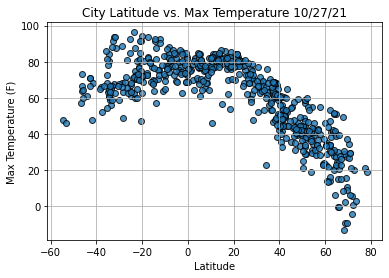

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

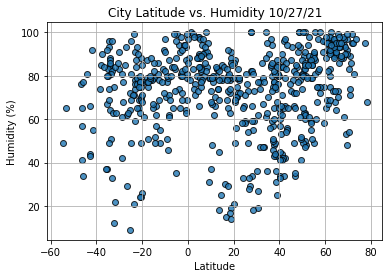

In [44]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

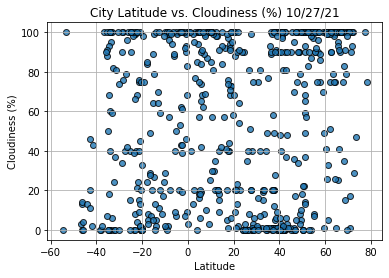

In [45]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

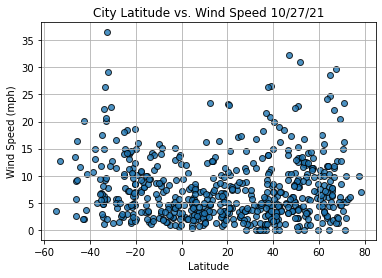

In [46]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()